# Método de la transformada inversa para generar la distribución triangular

Elaboró: **MARTINEZ PEREA EMILLI ASHLEY**

Código que genera una distribución triangular a partir del método de la transformada inversa. Los datos de la distrbucion son datos aleatorios generados por el mismo código. Al final graficamos en un histograma los datos simulados, con la media y desviacion estandar respecto a esos datos.



In [2]:
from random import random
from math import sqrt
import matplotlib.pyplot as plt
from statistics import mean, stdev
import matplotlib.pyplot as plt

La teoría empleada para este método es la siguiente: \\
**Distribución Triangular** \\
Sea una variable aleatoria X con distribución triangular definida por tres parámetros: \\
a: límite inferior \\
b: moda \\
c: límite superior \\


La función de distribución acumulada de la distribución triangular es:

$$
F(x) =
\begin{cases}
0 & \text{si } x < a \\
\frac{(x - a)^2}{(b - a)(c - a)} & \text{si } a \le x < b \\
1 - \frac{(c - x)^2}{(c - b)(c - a)} & \text{si } b \le x \le c \\
1 & \text{si } x > c
\end{cases}
$$

**Método de la Transformada Inversa**

El método consiste en generar una variable aleatoria $ U \sim \mathcal{U}(0,1) $ y aplicar la inversa de la función de distribución acumulada para obtener una muestra X de la distribución deseada.

Para la distribución triangular, la inversa de la función de distribución acumulada es:

$$
X =
\begin{cases}
a + \sqrt{U (b - a)(c - a)} & \text{si } U < \frac{b - a}{c - a} \\
c - \sqrt{(1 - U)(c - b)(c - a)} & \text{si } U \ge \frac{b - a}{c - a}
\end{cases}
$$

Este procedimiento genera muestras con la misma distribución triangular definida por los parámetros a, b, c.


Función que genera la distribución triangular

In [3]:
def funcion(a,b,c):
  k=(b-a)/(c-a)
  p=random()
  if p<k:
    x= a + sqrt(p*(b-a)*(c-a))
  else:
    x=c-sqrt((1-p)*(c-b)*(c-a))
  return x

Simulación de datos sobre la función previa

In [10]:
x=[]
for i in range(1,10000):
  x.append(funcion(1,3,5))
mean(x)

3.0010057856676906

Graficamos los datos

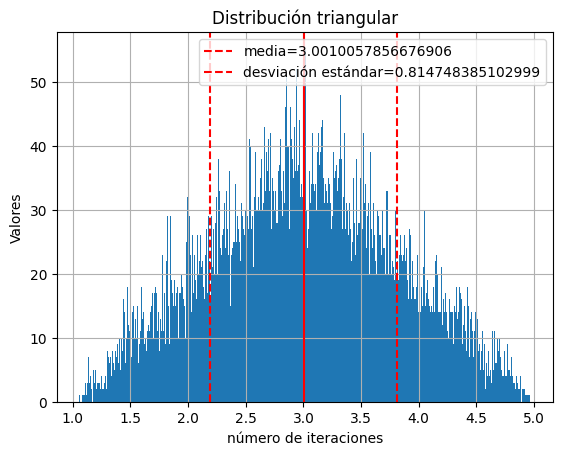

In [12]:
plt.hist(x,bins=500)#graficamos los puntos o datos del bloque anterior
plt.xlabel('número de iteraciones')
plt.ylabel('Valores')
plt.title('Distribución triangular')
plt.axvline(x=mean(x),color='r')
plt.axvline(x=mean(x)+ stdev(x),color='r',linestyle= '--',label=f"media={mean(x)}") #intervalos del error calculados a desviaciones estandar de la media
plt.axvline(x=mean(x)- stdev(x),color='r',linestyle= '--',label=f"desviación estándar={stdev(x)}")
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [13]:
mediasimu = mean(x)
stdevsimu = stdev(x)

a, b, c = 1, 3, 5
mediateo = (a + b + c)/3
stdevteo = (a**2 + b**2 + c**2 - a*b - a*c - b*c)/18

print("Media teórica:", mediateo)
print("Media simulada:", mediasimu)

print("\nVarianza teórica:", stdevteo)
print("Varianza simulada:", stdevsimu)

Media teórica: 3.0
Media simulada: 3.0010057856676906

Varianza teórica: 0.6666666666666666
Varianza simulada: 0.814748385102999
